## Outlier Detection and Removal

### Abstract

This notebook contains two functions. 

1- print_quantile_info: Print out the following information about the data.

2- remove_outliers_using_quantiles: Remove outliers according to the given fence value and return new dataframe.

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("../input/train.csv")

In [4]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
# Function: print_quantile_info(qu_dataset, qu_field)
#   Print out the following information about the data
#   - interquartile range
#   - upper_inner_fence
#   - lower_inner_fence
#   - upper_outer_fence
#   - lower_outer_fence
#   - percentage of records out of inner fences
#   - percentage of records out of outer fences
# Input: 
#   - pandas dataframe (qu_dataset)
#   - name of the column to analyze (qu_field)
# Output:
#   None

def print_quantile_info(qu_dataset, qu_field):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

In [6]:
print_quantile_info(df_train, "target")

interquartile range: 1.64856326
upper_inner_fence: 3.23829792
lower_inner_fence: -3.35595512
upper_outer_fence: 5.71114281
lower_outer_fence: -5.82880001
percentage of records out of inner fences: 7.63
percentage of records out of outer fences: 2.07


In [7]:
# Function: remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence)
#   1- Remove outliers according to the given fence value and return new dataframe.
#   2- Print out the following information about the data
#      - interquartile range
#      - upper_inner_fence
#      - lower_inner_fence
#      - upper_outer_fence
#      - lower_outer_fence
#      - percentage of records out of inner fences
#      - percentage of records out of outer fences
# Input: 
#   - pandas dataframe (qu_dataset)
#   - name of the column to analyze (qu_field)
#   - inner (1.5*iqr) or outer (3.0*iqr) (qu_fence) values: "inner" or "outer"
# Output:
#   - new pandas dataframe (output_dataset)

def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [8]:
df_train.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(df_train, "target", "inner")

interquartile range: 1.64856326
upper_inner_fence: 3.23829792
lower_inner_fence: -3.35595512
upper_outer_fence: 5.71114281
lower_outer_fence: -5.82880001
percentage of records out of inner fences: 7.63
percentage of records out of outer fences: 2.07
length of input dataframe: 201917
length of new dataframe after outlier removal: 186520


In [9]:
new_dataset.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


**Before outlier removal:**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histogram for Customer Loyalty Before Removal')

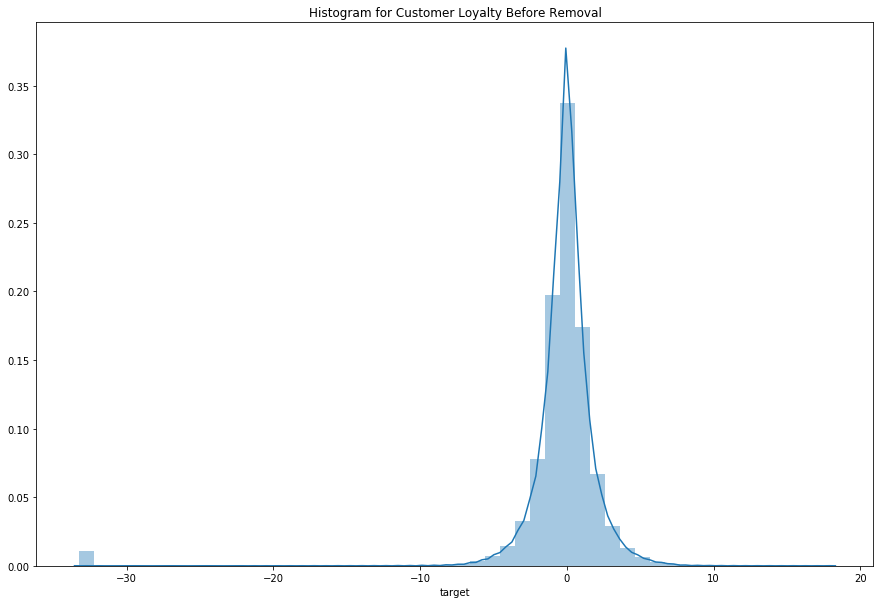

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(df_train["target"]);
plt.title('Histogram for Customer Loyalty Before Removal')

**After outlier removal:**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histogram for Customer Loyalty After Removal')

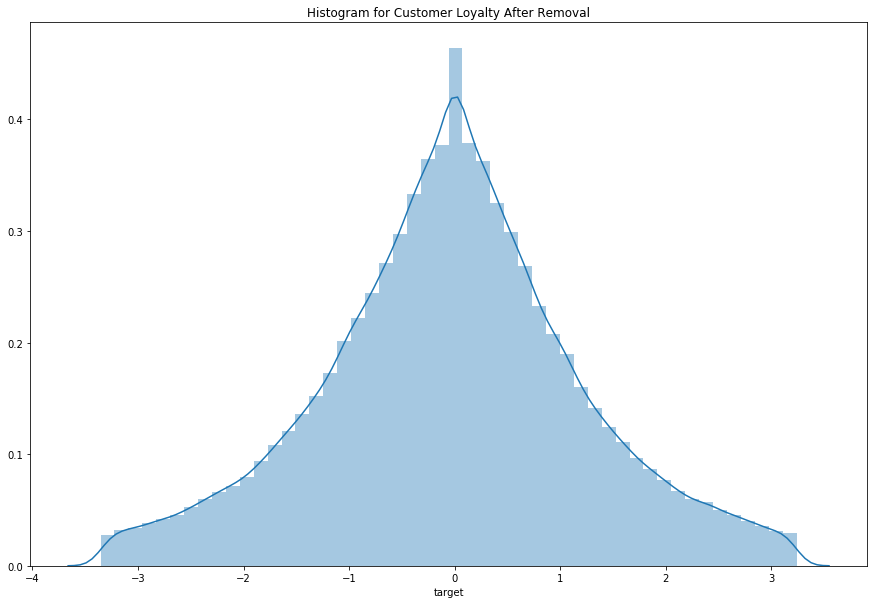

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(new_dataset["target"]);
plt.title('Histogram for Customer Loyalty After Removal')